<a href="https://colab.research.google.com/github/upsoprog/Tasks/blob/Big-data/Tp_3/Laboratorio_zona_de_peligro_grupo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Materia: Elementos del aprendizaje y Big Data**

*   Elemento de la lista
*   Elemento de la lista


Profesor: Valentín Barco

Grupo: 5


Interrogantes:

•	Macchia Sebastian

•	Paglino Guillermo

•	Peña Matias

•	Rodriguez Mikael

# **Montamos biblioteca drive**

In [ ]:
# Montar Google Drive en Google Colab para acceder a archivos almacenados en Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importamos las bibliotecas y cargamos los datos**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.graph_objs as go
!pip install us
import us  # Importar la librería us
!pip install --upgrade plotly





# **Preparacion para carga de datos**






In [ ]:
# Cargar el conjunto de datos
crimenes = "/content/drive/MyDrive/Clustering/Trabajo Clustering/Crimenes.csv"
data_crimenes = pd.read_csv(crimenes)

data_crimenes.head()


,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Estadísticas descriptivas


In [ ]:
data_crimenes.describe()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**Informacion del dataframe**

In [ ]:
data_crimenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estado            50 non-null     object 
 1   Asesinatos        50 non-null     float64
 2   Asaltos           50 non-null     int64  
 3   Poblacion Urbana  50 non-null     int64  
 4   Violaciones       50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# **Procesamiento de datos**




#Normalizacion de los datos


In [ ]:
# Mostrar el DataFrame original
print("Original DataFrame:")
print(data_crimenes.head())

# Copiar el DataFrame original
data_crimenes_nor = data_crimenes.copy()

# Seleccionar solo las columnas numéricas para la normalización
columnas_numericas = data_crimenes_nor[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']]

# Normalizar las columnas seleccionadas utilizando MinMaxScaler
scaler = MinMaxScaler()
columnas_numericas_normalized = scaler.fit_transform(columnas_numericas)

# Crear un nuevo DataFrame normalizado sin modificar el original
data_crimenes_nor[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']] = columnas_numericas_normalized

# Mostrar el DataFrame normalizado
print("\nDataFrame Normalizado:")
print(data_crimenes_nor.head())


Original DataFrame:
       Estado  Asesinatos  Asaltos  Poblacion Urbana  Violaciones
0     Alabama        13.2      236                58         21.2
1      Alaska        10.0      263                48         44.5
2     Arizona         8.1      294                80         31.0
3    Arkansas         8.8      190                50         19.5
4  California         9.0      276                91         40.6

DataFrame Normalizado:
       Estado  Asesinatos   Asaltos  Poblacion Urbana  Violaciones
0     Alabama    0.746988  0.654110          0.440678     0.359173
1      Alaska    0.554217  0.746575          0.271186     0.961240
2     Arizona    0.439759  0.852740          0.813559     0.612403
3    Arkansas    0.481928  0.496575          0.305085     0.315245
4  California    0.493976  0.791096          1.000000     0.860465


Vision compoleta dataframe Crimenes Normalizada

In [ ]:
data_crimenes_nor

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,0.746988,0.654110,0.440678,0.359173
1,Alaska,0.554217,0.746575,0.271186,0.961240
2,Arizona,0.439759,0.852740,0.813559,0.612403
3,Arkansas,0.481928,0.496575,0.305085,0.315245
4,California,0.493976,0.791096,1.000000,0.860465
5,Colorado,0.427711,0.544521,0.779661,0.811370
6,Connecticut,0.150602,0.222603,0.762712,0.098191
7,Delaware,0.307229,0.660959,0.677966,0.219638
8,Florida,0.879518,0.993151,0.813559,0.635659
9,Georgia,1.000000,0.568493,0.474576,0.478036


Descripcion de dataframe Crimenes Organizados

In [ ]:
data_crimenes_nor.describe()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


#Nos aseguramos que data_crimenes_nor sean datos numericos

In [ ]:

print(data_crimenes_nor.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estado            50 non-null     object 
 1   Asesinatos        50 non-null     float64
 2   Asaltos           50 non-null     float64
 3   Poblacion Urbana  50 non-null     float64
 4   Violaciones       50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [ ]:
#Verificamos Valores faltantes
data_crimenes_nor_limpio = data_crimenes_nor.isnull().sum()
data_crimenes_nor_limpio


Estado              0
Asesinatos          0
Asaltos             0
Poblacion Urbana    0
Violaciones         0
dtype: int64

In [ ]:
#Valores Infinitos o NaN:
data_crimenes_nor_limpio.isin([np.inf, -np.inf, np.nan]).sum()
data_crimenes_nor_limpio


Estado              0
Asesinatos          0
Asaltos             0
Poblacion Urbana    0
Violaciones         0
dtype: int64

**Elimino columna Poblacion Urbana porque no la voy a usar**

In [ ]:
# Verificar las columnas actuales en tu DataFrame
print("Columnas antes de eliminar:")
print(data_crimenes_nor.columns)

# Eliminar la columna 'Poblacion Urbana'
column_to_drop = 'Poblacion Urbana'
data_crimenes_nor = data_crimenes_nor.drop(column_to_drop, axis=1)

# Verificar las columnas después de eliminar
print("\nColumnas después de eliminar:")
print(data_crimenes_nor.columns)

Columnas antes de eliminar:
Index(['Estado', 'Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones'], dtype='object')

Columnas después de eliminar:
Index(['Estado', 'Asesinatos', 'Asaltos', 'Violaciones'], dtype='object')


In [ ]:
data_crimenes_nor

,Estado,Asesinatos,Asaltos,Violaciones
0,Alabama,0.746988,0.654110,0.359173
1,Alaska,0.554217,0.746575,0.961240
2,Arizona,0.439759,0.852740,0.612403
3,Arkansas,0.481928,0.496575,0.315245
4,California,0.493976,0.791096,0.860465
5,Colorado,0.427711,0.544521,0.811370
6,Connecticut,0.150602,0.222603,0.098191
7,Delaware,0.307229,0.660959,0.219638
8,Florida,0.879518,0.993151,0.635659
9,Georgia,1.000000,0.568493,0.478036


# KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

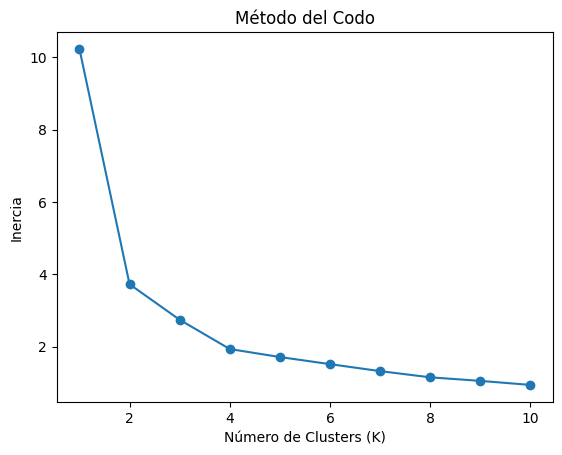

In [ ]:
# Seleccionar solo las columnas numéricas normalizadas para el clustering
data_crimenes_cluster = data_crimenes_nor[['Asesinatos', 'Asaltos', 'Violaciones']]

# Calcular la inercia para diferentes valores de K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_crimenes_cluster)
    inertia.append(kmeans.inertia_)

# Visualizar la curva del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.show()


**Elección del número de clusters (K)**



***Utilizamos método del codo para elegir el número óptimo de clusters.***


 Entrenamiento del modelo K-Means

 Basándonos en la curva del codo, elige un valor de K (n_clusters) en donde la curva empiece a tomar "impulso"

In [ ]:
# Copiar el DataFrame original

# Seleccionar solo las columnas numéricas para la normalización
columnas_numericas = data_crimenes_nor[['Asesinatos', 'Asaltos', 'Violaciones']]

# Normalizar las columnas seleccionadas
scaler = MinMaxScaler()
columnas_numericas_normalized = scaler.fit_transform(columnas_numericas)

# Crear un nuevo DataFrame normalizado sin modificar el original
data_crimenes_nor[['Asesinatos', 'Asaltos', 'Violaciones']] = columnas_numericas_normalized

# Elegir el valor de K
k = 4

# Ajustar el modelo KMeans excluyendo la columna 'Estado'
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_crimenes_nor.drop('Estado', axis=1))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

Ya estan los grupos armados, se los debe incorporar a nuestro dataframe

In [ ]:
# Elegir el valor de K
k = 4

# Ajustar el modelo KMeans excluyendo la columna 'Estado'
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_crimenes_nor.drop('Estado', axis=1))

# Agregar las etiquetas de los clusters al DataFrame original
data_crimenes_nor['KMean_Cluster'] = kmeans.predict(data_crimenes_nor.drop('Estado', axis=1))

# Mostrar las primeras filas del DataFrame con las etiquetas de los clusters
data_crimenes_nor


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Estado,Asesinatos,Asaltos,Violaciones,KMean_Cluster
0,Alabama,0.746988,0.654110,0.359173,2
1,Alaska,0.554217,0.746575,0.961240,1
2,Arizona,0.439759,0.852740,0.612403,1
3,Arkansas,0.481928,0.496575,0.315245,3
4,California,0.493976,0.791096,0.860465,1
5,Colorado,0.427711,0.544521,0.811370,1
6,Connecticut,0.150602,0.222603,0.098191,0
7,Delaware,0.307229,0.660959,0.219638,3
8,Florida,0.879518,0.993151,0.635659,2
9,Georgia,1.000000,0.568493,0.478036,2


Visualización de resultados

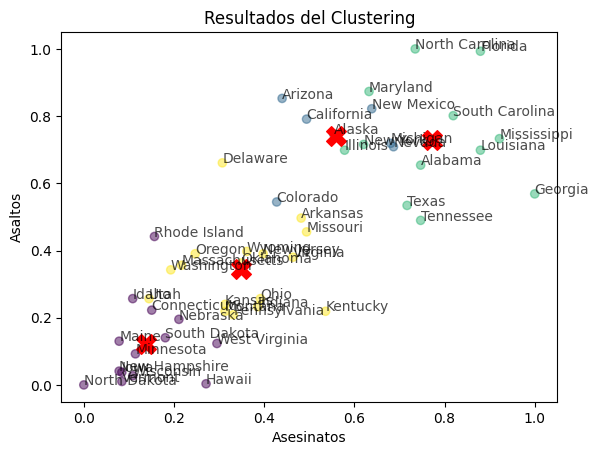

In [ ]:
# Visualizar los resultados en un gráfico de dispersión 2D
plt.scatter(data_crimenes_nor['Asesinatos'], data_crimenes_nor['Asaltos'], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.title('Resultados del Clustering')
plt.xlabel('Asesinatos')
plt.ylabel('Asaltos')

# Etiquetar cada punto con el nombre del Estado
for i, estado in enumerate(data_crimenes_nor['Estado']):
    plt.annotate(estado, (data_crimenes_nor['Asesinatos'].iloc[i], data_crimenes_nor['Asaltos'].iloc[i]), alpha=0.7)

plt.show()


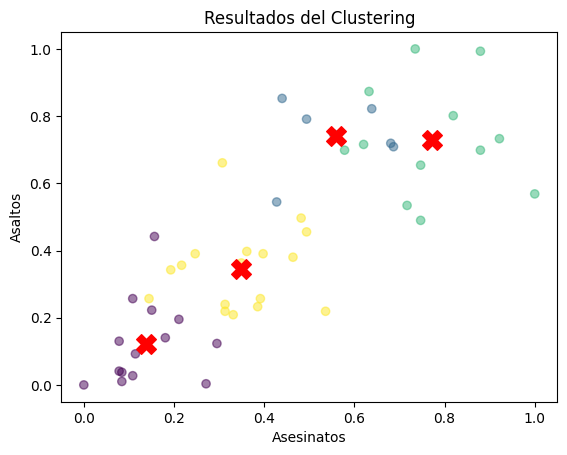

In [ ]:
# Visualizar los resultados en un gráfico de dispersión 2D sin etiquetas de estados
plt.scatter(data_crimenes_nor['Asesinatos'], data_crimenes_nor['Asaltos'], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.title('Resultados del Clustering')
plt.xlabel('Asesinatos')
plt.ylabel('Asaltos')
plt.show()


Podemos definir las zonas de riesgo:

Dado que poseemos múltiples características inherentes a nuestros grupos, la
representación gráfica directa de estas características resulta impracticable. No obstante, emplearemos una función de la biblioteca scikit-learn que nos posibilitará la generación de dos grupos similares para condensar estas características, con el propósito exclusivo de proporcionar una visualización concisa de nuestros resultados.







In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Supongamos que 'data_crimenes_nor' es tu DataFrame normalizado
# Asegúrate de tener tus datos correctamente cargados antes de ejecutar este código

# Seleccionar las columnas numéricas para el análisis de componentes principales (PCA)
columnas_numericas = data_crimenes_nor[['Asesinatos', 'Asaltos', 'Violaciones']]

# Eliminar cualquier columna 'KMeans_Cluster' existente
data_crimenes_nor = data_crimenes_nor.drop(['KMeans_Cluster'], axis=1, errors='ignore')

# Inicializar y ajustar el modelo KMeans con el número deseado de clústeres
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data_crimenes_nor['KMeans_Cluster'] = kmeans.fit_predict(columnas_numericas)

# Mapear los resultados de KMeans a etiquetas de riesgo
etiquetas_riesgo = {
    0: 'Zona de bajo riesgo',
    1: 'Zona de riesgo medio',
    2: 'Zona de riesgo alto'
}

# Crear una nueva columna con las etiquetas de riesgo y agregarla al DataFrame
data_crimenes_nor['Nivel_Riesgo'] = data_crimenes_nor['KMeans_Cluster'].map(etiquetas_riesgo)

# Inicializar y ajustar el modelo PCA con el número deseado de componentes
num_componentes = 2
pca = PCA(n_components=num_componentes)
pca_resultados = pca.fit_transform(columnas_numericas)

# Crear un nuevo DataFrame con los resultados de PCA
columnas_pca = [f'componente{i+1}' for i in range(num_componentes)]
pca_df = pd.DataFrame(data=pca_resultados, columns=columnas_pca)

# Concatenar los resultados de PCA con la información de los clústeres KMeans
pca_grupos = pd.concat([pca_df, data_crimenes_nor[['KMeans_Cluster', 'Nivel_Riesgo']]], axis=1)

# Mostrar las primeras filas del DataFrame resultante
data_crimenes_nor[['Estado', 'Asesinatos', 'Asaltos', 'Violaciones', 'Nivel_Riesgo']].head()

print("--------------")

# Elimina la columna 'nombre_columna'
columna_a_eliminar = 'KMean_Cluster'
data_crimenes_limpio = data_crimenes_nor.drop(columna_a_eliminar, axis=1)

data_crimenes_limpio


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--------------


,Estado,Asesinatos,Asaltos,Violaciones,Nivel_Riesgo,KMeans_Cluster
0,Alabama,0.746988,0.654110,0.359173,Zona de riesgo medio,1
1,Alaska,0.554217,0.746575,0.961240,Zona de riesgo medio,1
2,Arizona,0.439759,0.852740,0.612403,Zona de riesgo medio,1
3,Arkansas,0.481928,0.496575,0.315245,Zona de bajo riesgo,0
4,California,0.493976,0.791096,0.860465,Zona de riesgo medio,1
5,Colorado,0.427711,0.544521,0.811370,Zona de riesgo medio,1
6,Connecticut,0.150602,0.222603,0.098191,Zona de riesgo alto,2
7,Delaware,0.307229,0.660959,0.219638,Zona de bajo riesgo,0
8,Florida,0.879518,0.993151,0.635659,Zona de riesgo medio,1
9,Georgia,1.000000,0.568493,0.478036,Zona de riesgo medio,1


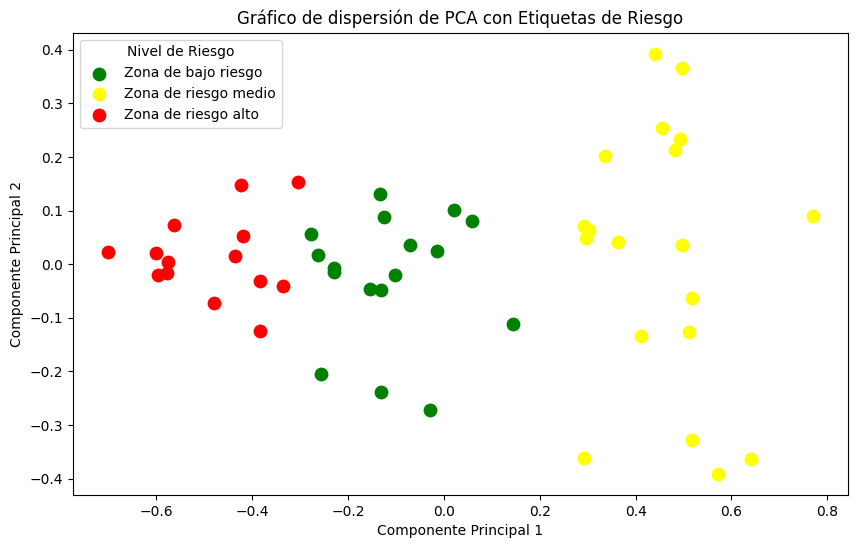

In [ ]:
# Mapear las etiquetas de riesgo a colores
colores_riesgo = {
    'Zona de bajo riesgo': 'green',
    'Zona de riesgo medio': 'yellow',
    'Zona de riesgo alto': 'red'
}

# Graficar los resultados de PCA coloreados por las zonas de riesgo
plt.figure(figsize=(10, 6))
for riesgo, color in colores_riesgo.items():
    subset = pca_grupos[pca_grupos['Nivel_Riesgo'] == riesgo]
    plt.scatter(subset['componente1'], subset['componente2'], label=riesgo, color=color, s=80)

plt.title('Gráfico de dispersión de PCA con Etiquetas de Riesgo')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Nivel de Riesgo')
plt.show()


In [ ]:
import plotly.graph_objs as go
import plotly.express as px
import us

# Obtener las abreviaturas de los estados
abreviaturas_estados = {estado.name: estado.abbr for estado in us.states.STATES}

# Crear una copia del DataFrame
data_crimenes_modificado = data_crimenes_nor.copy()

# Abreviar los nombres de los estados
data_crimenes_modificado['Estado'] = data_crimenes_modificado['Estado'].apply(
    lambda x: abreviaturas_estados.get(x, x)
)

# Mapear el nivel de riesgo a valores numéricos
nivel_riesgo_map = {'Zona de riesgo alto': 3, 'Zona de bajo riesgo': 1, 'Zona de riesgo medio': 2}
data_crimenes_modificado['Nivel_Riesgo_Num'] = data_crimenes_modificado['Nivel_Riesgo'].map(nivel_riesgo_map)

# Mapear el nivel de riesgo a colores
color_map = {3: 'red', 1: 'green', 2: 'yellow'}
data_crimenes_modificado['Color'] = data_crimenes_modificado['Nivel_Riesgo_Num'].map(color_map)

# Generar mapa de calor
fig = go.Figure(data=go.Choropleth(
    locations=data_crimenes_modificado['Estado'],
    z=data_crimenes_modificado['Nivel_Riesgo_Num'],
    locationmode='USA-states',
    colorscale=[[0, 'green'], [0.25, 'yellow'], [0.75, 'orange'], [1, 'red']],
    colorbar_title='Nivel de Riesgo',
    text=data_crimenes_modificado['Estado'],
    hoverinfo='location+z',
    marker_line_color=data_crimenes_modificado['Color'],  # Especificar los colores directamente aquí
    marker_line_width=0.5,
))

fig.update_layout(
    title_text='Mapa de Estados por Nivel de Riesgo',
    geo_scope='usa'
)

# Mostrar el mapa
fig.show()


<ipython-input-23-0005289b17bb>:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



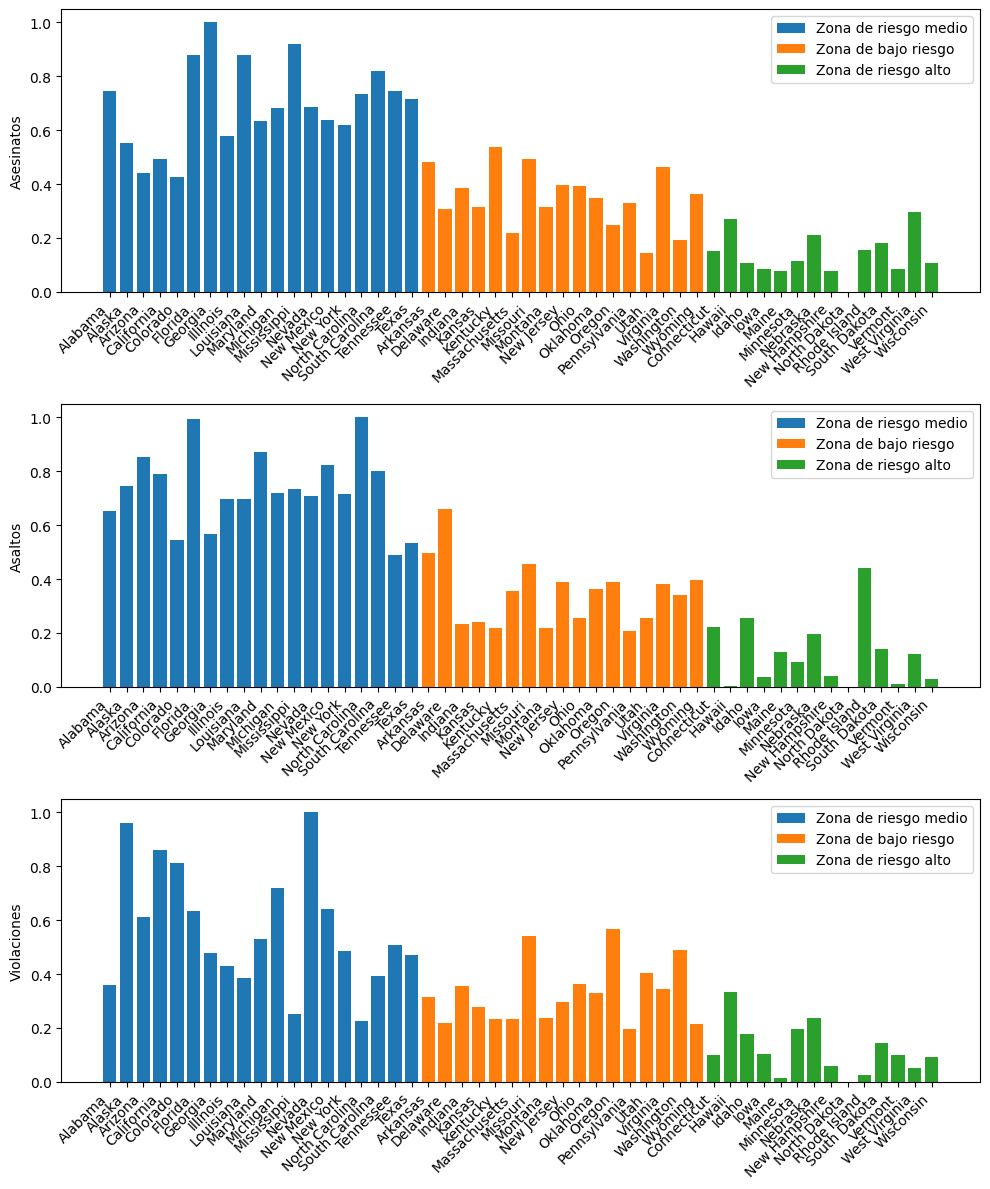

In [ ]:
# Crear gráfico de barras por cada delito y nivel de riesgo
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

for i, delito in enumerate(['Asesinatos', 'Asaltos', 'Violaciones']):
    ax = axes[i]
    for nivel in data_crimenes_nor['Nivel_Riesgo'].unique():
        subset = data_crimenes_nor[data_crimenes_nor['Nivel_Riesgo'] == nivel]
        ax.bar(subset['Estado'], subset[delito], label=nivel)

    ax.set_ylabel(delito)
    ax.legend()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotar etiquetas

plt.tight_layout()
plt.show()


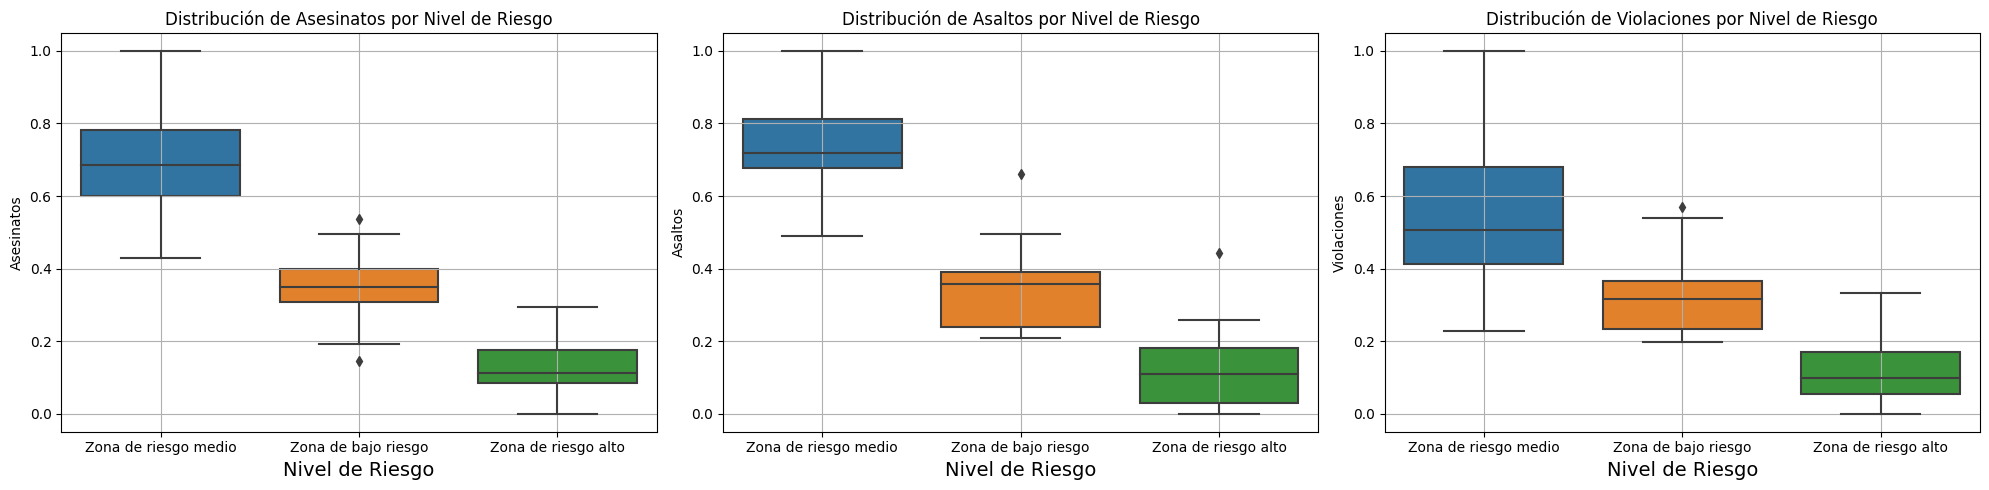

In [ ]:
import seaborn as sns

# Crear subgráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Boxplot para Asesinatos
sns.boxplot(x='Nivel_Riesgo', y='Asesinatos', data=data_crimenes_nor, ax=axes[0])
axes[0].set_xlabel('Nivel de Riesgo', fontsize=14)
axes[0].set_ylabel('Asesinatos')
axes[0].set_title('Distribución de Asesinatos por Nivel de Riesgo')
axes[0].grid(True)

# Boxplot para Asaltos
sns.boxplot(x='Nivel_Riesgo', y='Asaltos', data=data_crimenes_nor, ax=axes[1])
axes[1].set_xlabel('Nivel de Riesgo', fontsize=14)
axes[1].set_ylabel('Asaltos')
axes[1].set_title('Distribución de Asaltos por Nivel de Riesgo')
axes[1].grid(True)

# Boxplot para Violaciones
sns.boxplot(x='Nivel_Riesgo', y='Violaciones', data=data_crimenes_nor, ax=axes[2])
axes[2].set_xlabel('Nivel de Riesgo', fontsize=14)
axes[2].set_ylabel('Violaciones')
axes[2].set_title('Distribución de Violaciones por Nivel de Riesgo')
axes[2].grid(True)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


# **Como conclusion**

Divido el dataframe data_crimenes_limpio en 3 sub datas para agilizar lectura de datos

In [ ]:
# DataFrame para 'zona de riesgo bajo'
df_riesgo_bajo = data_crimenes_limpio[data_crimenes_limpio['Nivel_Riesgo'] == 'Zona de bajo riesgo']

# DataFrame para 'zona de riesgo medio'
df_riesgo_medio = data_crimenes_limpio[data_crimenes_limpio['Nivel_Riesgo'] == 'Zona de riesgo medio	']

# DataFrame para 'zona de riesgo alto'
df_riesgo_alto = data_crimenes_limpio[data_crimenes_limpio['Nivel_Riesgo'] == 'Zona de riesgo alto']

Dataframe Zonas de bajo riesgo

In [ ]:
df_riesgo_bajo

,Estado,Asesinatos,Asaltos,Violaciones,Nivel_Riesgo,KMeans_Cluster
3,Arkansas,0.481928,0.496575,0.315245,Zona de bajo riesgo,0
7,Delaware,0.307229,0.660959,0.219638,Zona de bajo riesgo,0
13,Indiana,0.385542,0.232877,0.354005,Zona de bajo riesgo,0
15,Kansas,0.313253,0.239726,0.276486,Zona de bajo riesgo,0
16,Kentucky,0.536145,0.219178,0.232558,Zona de bajo riesgo,0
20,Massachusetts,0.216867,0.356164,0.232558,Zona de bajo riesgo,0
24,Missouri,0.493976,0.455479,0.540052,Zona de bajo riesgo,0
25,Montana,0.313253,0.219178,0.235142,Zona de bajo riesgo,0
29,New Jersey,0.397590,0.390411,0.297158,Zona de bajo riesgo,0
34,Ohio,0.391566,0.256849,0.364341,Zona de bajo riesgo,0


Top 5 con menos riesgos a Asesinatos

In [ ]:
# Ordenar por el índice de 'Asesinatos' de menor a mayor
df_riesgo_bajo_sorted = df_riesgo_bajo.sort_values(by='Asesinatos')

# Mostrar las 5 más bajas
bottom_5_riesgo_bajo = df_riesgo_bajo_sorted.head(5)
bottom_5_riesgo_bajo


,Estado,Asesinatos,Asaltos,Violaciones,Nivel_Riesgo,KMeans_Cluster
43,Utah,0.144578,0.256849,0.403101,Zona de bajo riesgo,0
46,Washington,0.192771,0.342466,0.488372,Zona de bajo riesgo,0
20,Massachusetts,0.216867,0.356164,0.232558,Zona de bajo riesgo,0
36,Oregon,0.246988,0.390411,0.568475,Zona de bajo riesgo,0
7,Delaware,0.307229,0.660959,0.219638,Zona de bajo riesgo,0


Dataframe de Zona de riesgo alto

In [ ]:
df_riesgo_alto

,Estado,Asesinatos,Asaltos,Violaciones,Nivel_Riesgo,KMeans_Cluster
6,Connecticut,0.150602,0.222603,0.098191,Zona de riesgo alto,2
10,Hawaii,0.271084,0.003425,0.333333,Zona de riesgo alto,2
11,Idaho,0.108434,0.256849,0.178295,Zona de riesgo alto,2
14,Iowa,0.084337,0.037671,0.103359,Zona de riesgo alto,2
18,Maine,0.078313,0.130137,0.012920,Zona de riesgo alto,2
22,Minnesota,0.114458,0.092466,0.196382,Zona de riesgo alto,2
26,Nebraska,0.210843,0.195205,0.237726,Zona de riesgo alto,2
28,New Hampshire,0.078313,0.041096,0.056848,Zona de riesgo alto,2
33,North Dakota,0.000000,0.000000,0.000000,Zona de riesgo alto,2
38,Rhode Island,0.156627,0.441781,0.025840,Zona de riesgo alto,2


Top 5 ciudades mas peligrossas con mas indice de Asesinatos

In [ ]:
# Ordenar por el índice de 'Asesinatos' de mayor a menor
df_riesgo_alto_sorted = df_riesgo_alto.sort_values(by='Asesinatos', ascending=False)

# Mostrar las 5 más altas
top_5_riesgo_alto = df_riesgo_alto_sorted.head(5)
top_5_riesgo_alto



,Estado,Asesinatos,Asaltos,Violaciones,Nivel_Riesgo,KMeans_Cluster
47,West Virginia,0.295181,0.123288,0.051680,Zona de riesgo alto,2
10,Hawaii,0.271084,0.003425,0.333333,Zona de riesgo alto,2
26,Nebraska,0.210843,0.195205,0.237726,Zona de riesgo alto,2
40,South Dakota,0.180723,0.140411,0.142119,Zona de riesgo alto,2
38,Rhode Island,0.156627,0.441781,0.025840,Zona de riesgo alto,2


Podemos concluir que de las ciudades mas riesgosas, la que mas omicidios tiene es Vest Virginia